In [1]:
#setwd("/Users/Data")
#getwd()
data.Main <- read.csv(url("https://raw.githubusercontent.com/sqlshep/SQLShepBlog/master/data/USA.dataAll.csv"),stringsAsFactors=FALSE,header=TRUE)

In [2]:
head(data.Main)

X,state_abbr,county_name,RuralUrbanCode,Winner,Population,Poverty,PovertyPercent,EDU_LessHSDiploma,EDU_HSDiploma,⋯,lg_GINI_Coeff,lg_HHMedianIncome,lg_HHMeanIncome,lg_PerCapitaPI,lg_Diabetes,lg_Inactivity,lg_Obesity,lg_Uninsured,lg_OpioidRx,combined_fips
1,AL,Autauga County,2,1,54860,6966,12.7,12.8,33.5,⋯,3.732896,10.84508,11.07852,10.53935,2.564949,3.353407,3.529297,2.079442,2.274186,1001
2,AL,Baldwin County,3,1,201006,25941,12.9,10.5,28.8,⋯,3.793239,10.82485,11.12975,10.59966,2.341806,3.104587,3.310543,2.079442,2.202765,1003
3,AL,Barbour County,6,1,23066,7380,32.0,26.7,34.5,⋯,3.850148,10.40317,10.70746,10.35593,2.912351,3.459466,3.793239,2.708050,1.747459,1005
4,AL,Bibb County,1,1,20326,4516,22.2,19.3,42.1,⋯,3.790985,10.56303,10.86362,10.27763,2.694627,3.523415,3.696351,2.302585,1.553925,1007
5,AL,Blount County,1,1,57116,8399,14.7,21.5,33.4,⋯,3.691376,10.73232,10.91298,10.36290,2.646175,3.332205,3.543854,2.302585,1.818077,1009
6,AL,Bullock County,6,0,8956,3544,39.6,35.1,33.3,⋯,-99.000000,10.37155,10.64416,10.16312,2.975530,3.456317,3.761200,2.833213,1.355835,1011


In [18]:
#install.packages("ResourceSelection")

library(car)
library(GGally)
library(ggplot2)
library(ResourceSelection)


options(scipen=999)

#TURN WARNINGS OFF
options(warn=-1)

#TURN WARNINGS ON
#options(warn=0)



In [4]:
#remove all NAs and infinites 
is.na(data.Main) <- sapply(data.Main, is.infinite)
data.Main[is.na(data.Main)] <-0

data.Main <- data.Main[!(data.Main$X == "1864"),]

In [5]:
#names(data.Main[6:26])
names(data.Main)


[1] "X"                       "state_abbr"             
 [3] "county_name"             "RuralUrbanCode"         
 [5] "Winner"                  "Population"             
 [7] "Poverty"                 "PovertyPercent"         
 [9] "EDU_LessHSDiploma"       "EDU_HSDiploma"          
[11] "EDU_SomeCollegeorAS"     "EDU_BSorHigher"         
[13] "UnemploymentRate"        "Married"                
[15] "Divorced"                "GINI_Coeff"             
[17] "HHMedianIncome"          "HHMeanIncome"           
[19] "PerCapitaPI"             "Diabetes"               
[21] "Inactivity"              "Obesity"                
[23] "Uninsured"               "OpiodRx"                
[25] "USDANaturalAmenityScale" "USDANaturalAmenityRank" 
[27] "RUC_1"                   "RUC_2"                  
[29] "RUC_3"                   "RUC_4"                  
[31] "RUC_5"                   "RUC_6"                  
[33] "RUC_7"                   "RUC_8"                  
[35] "lg_Population"           "lg_Poverty"             
[37] "lg_PovertyPercent"       "lg_EDU_LessHSDiploma"   
[39] "lg_EDU_HSDiploma"        "lg_EDU_SomeCollegeorAS" 
[41] "lg_EDU_BSorHigher"       "lg_UnemploymentRate"    
[43] "lg_Married"              "lg_Divorced"            
[45] "lg_GINI_Coeff"           "lg_HHMedianIncome"      
[47] "lg_HHMeanIncome"         "lg_PerCapitaPI"         
[49] "lg_Diabetes"             "lg_Inactivity"          
[51] "lg_Obesity"              "lg_Uninsured"           
[53] "lg_OpioidRx"             "combined_fips"

#### This the best model we have based on the testign we did yesterday. 

In [8]:
elect_lg.glm <- glm(Winner ~ lg_Population + lg_PovertyPercent + lg_EDU_HSDiploma + 
      lg_EDU_SomeCollegeorAS + lg_EDU_BSorHigher + lg_UnemploymentRate + 
      lg_Married + lg_HHMeanIncome + lg_Diabetes + lg_Inactivity + 
      lg_OpioidRx, family = binomial, data = data.Main)




In [9]:
summary(elect_lg.glm)


Call:
glm(formula = Winner ~ lg_Population + lg_PovertyPercent + lg_EDU_HSDiploma + 
    lg_EDU_SomeCollegeorAS + lg_EDU_BSorHigher + lg_UnemploymentRate + 
    lg_Married + lg_HHMeanIncome + lg_Diabetes + lg_Inactivity + 
    lg_OpioidRx, family = binomial, data = data.Main)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-3.2271   0.0507   0.1407   0.3200   2.6626  

Coefficients:
                       Estimate Std. Error z value             Pr(>|z|)    
(Intercept)            -17.0767     2.6280  -6.498      0.0000000000815 ***
lg_Population           -0.2542     0.0626  -4.061      0.0000488072135 ***
lg_PovertyPercent       -1.7349     0.2584  -6.715      0.0000000000188 ***
lg_EDU_HSDiploma         2.0626     0.4759   4.334      0.0000146501892 ***
lg_EDU_SomeCollegeorAS   2.9949     0.4528   6.615      0.0000000000373 ***
lg_EDU_BSorHigher       -1.1135     0.3354  -3.320              0.00090 ***
lg_UnemploymentRate     -1.5169     0.2976  -5.097      0.000

Notice all of hour p-values are less than .05 which is what we truly desire in life, what we do dnot know id if any of the remaining variables are collinear, so how mighty we figure that out?  

In [19]:

x<-vif(elect_lg.glm)
data.frame(x)




,x
lg_Population,1.905393
lg_PovertyPercent,2.626739
lg_EDU_HSDiploma,2.991355
lg_EDU_SomeCollegeorAS,1.804362
lg_EDU_BSorHigher,4.620402
lg_UnemploymentRate,1.900364
lg_Married,3.877920
lg_HHMeanIncome,6.223086
lg_Diabetes,3.366460
lg_Inactivity,4.267897


In [20]:

#vif(elect_lg.glm) > 2
x[vif(elect_lg.glm) > 2]


lg_PovertyPercent  lg_EDU_HSDiploma lg_EDU_BSorHigher        lg_Married 
         2.626739          2.991355          4.620402          3.877920 
  lg_HHMeanIncome       lg_Diabetes     lg_Inactivity 
         6.223086          3.366460          4.267897

In [23]:

cols = c("Winner",names(x[vif(elect_lg.glm) > 2]))
cols




[1] "Winner"            "lg_PovertyPercent" "lg_EDU_HSDiploma" 
[4] "lg_EDU_BSorHigher" "lg_Married"        "lg_HHMeanIncome"  
[7] "lg_Diabetes"       "lg_Inactivity"

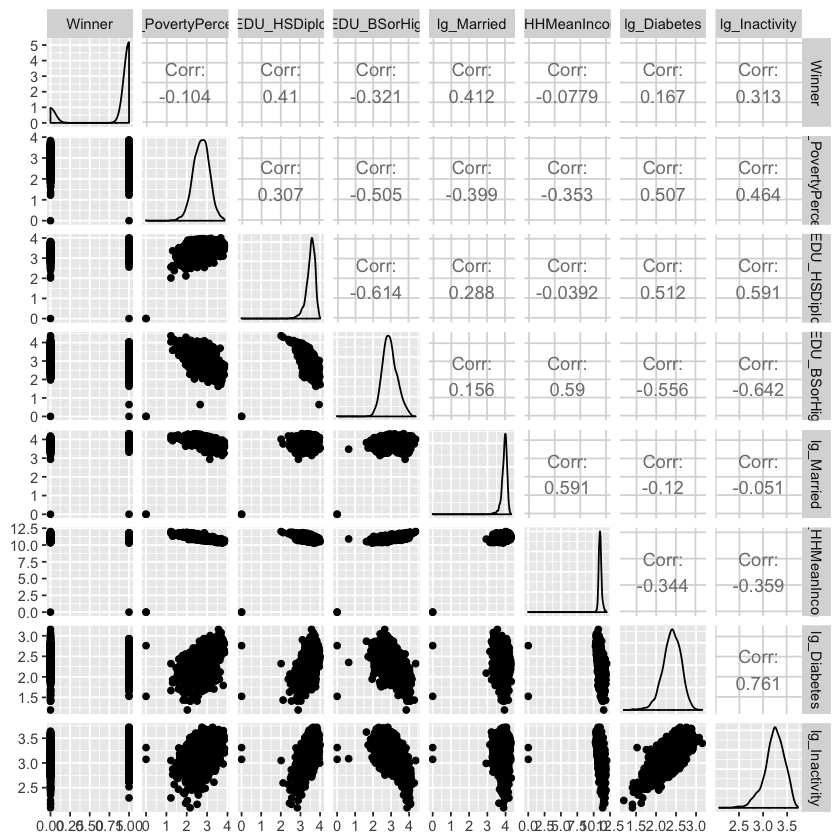

In [24]:
#This will take a minute or two
ggpairs(data=data.Main,columns=cols)

In [27]:

hoslem.test(elect_lg.glm$y, fitted(elect_lg.glm), g=10)


	Hosmer and Lemeshow goodness of fit (GOF) test

data:  elect_lg.glm$y, fitted(elect_lg.glm)
X-squared = 5.7183, df = 8, p-value = 0.6788


In [ ]:
#perform prediction with the dataset(total cheating)
elect.probs = predict(elect_lg.glm, type="response")
elect.probs[1:10]

#copy hte dataframe
data.Hold <-  data.Main

elect.pred=rep("Trump",3151)
elect.pred[elect.probs < .5] = "Hillary"

# replace the 0 and 1 with the names so the table is easier to read
data.Hold$Winner[data.Hold$Winner == '1'] ="Trump"
data.Hold$Winner[data.Hold$Winner == '0'] ="Hillary"

table(elect.pred,data.Hold$Winner)

